In [1]:
#Image recognition using CNN
#Dataset

In [2]:
#!pip install tensorflow

In [3]:
 #First import all basic libraries
import pandas as PD
import numpy as NP
import matplotlib.pyplot as MPL
import seaborn as SB
import warnings
warnings.filterwarnings('ignore')
import tensorflow as TF

In [4]:
#inbuilt dataset : fashion_mnist which define in tensorflow.keras.datasets
#library

(IP_train,OP_train),(IP_test,OP_test)=TF.keras.datasets.fashion_mnist.load_data()

In [5]:
#inbuilt dataset : fashion_mnist which define in tensorflow.keras.datasets
#library

(IP_train,OP_train),(IP_test,OP_test)=TF.keras.datasets.fashion_mnist.load_data()

In [6]:
IP_train.shape,OP_train.shape

((60000, 28, 28), (60000,))

In [7]:
IP_test.shape,OP_test.shape

((10000, 28, 28), (10000,))

In [8]:
IP_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
#To check label pf first image.
OP_train[9]

5

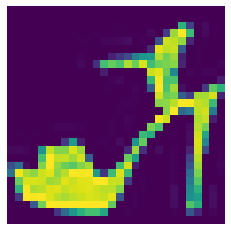

In [10]:
#To show image
MPL.imshow(IP_train[9])
MPL.axis('off')
MPL.show()

In [11]:
# find the unique labels (as numbers in this case)
labels_unique = NP.unique(OP_train)
print('Unique labels : ', labels_unique)
# find the total number of unique classes
num_classes = len(labels_unique)
print('Total number of classes : ', num_classes)

Unique labels :  [0 1 2 3 4 5 6 7 8 9]
Total number of classes :  10


In [12]:
#How many category in given dataset
#Loads the Fashion-MNIST dataset.
'''
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as a
drop-in replacement for MNIST. The class labels are:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

'''
print()

In [13]:
#Class Label List
Class_Labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(Class_Labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


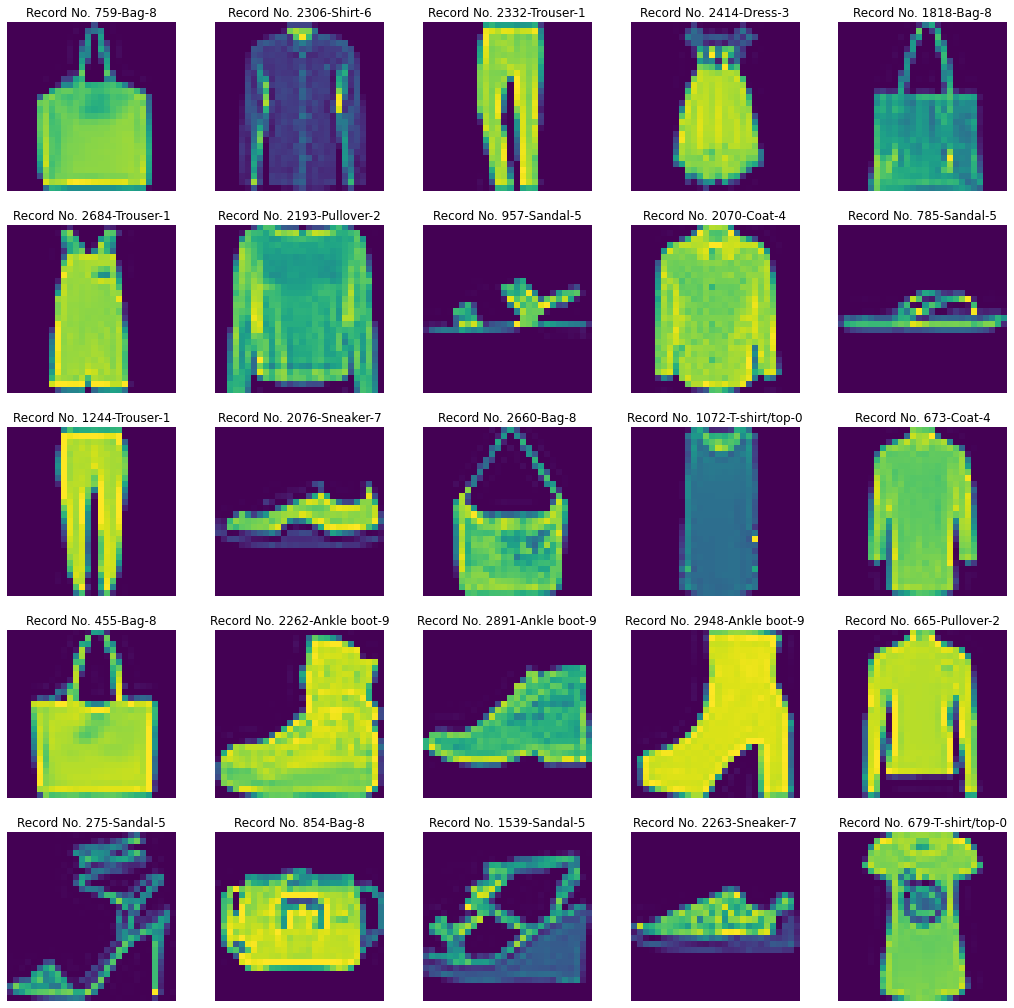

In [14]:
#to show 25 images randomly
MPL.figure(figsize=(18,18))
j=1
for i in NP.random.randint(0,3000,25) : 
    #select any 25 images from first 1000 images
    MPL.subplot(5,5,j);j=j+1
    MPL.imshow(IP_train[i])
    MPL.axis('off')
    MPL.title("Record No. {}-{}-{}".format(i+1,Class_Labels[OP_train[i]],OP_train[i]))

In [15]:
#change the dimesion of testing data
#We have to converts 3D dimension dataset into 4D dimension dataset
#so we use inbuilt method of numpy :  expand_dims()
IP_train = NP.expand_dims(IP_train,-1)#expand_dims(data,axis)
#check dimension of training data after expand dimension
print("Dimension : ",IP_train.ndim)
#Check shape of training data after expand dimension
print(IP_train.shape)

Dimension :  4
(60000, 28, 28, 1)


In [16]:
#change the dimesion of testing data
#We have to converts 3D dimension dataset into 4D dimension dataset
#so we use inbuilt method of numpy :  expand_dims()
IP_test = NP.expand_dims(IP_test,-1)#expand_dims(data,axis)
#check dimension of training data after expand dimension
print("Dimension : ",IP_test.ndim)
#Check shape of training data after expand dimension
print(IP_test.shape)

Dimension :  4
(10000, 28, 28, 1)


In [17]:
#Import train_test_split
from sklearn.model_selection import train_test_split
IP_train,IP_val,OP_train,OP_val = train_test_split(IP_train,OP_train,test_size=0.2,random_state=1)

In [18]:
#training error > testing error :  model is perfect
#Split Dataset (To split training dataset into train data and #validation data)
#Means take 80% data for training and 20% for validation from 
#X_train and Y_train
#Call train_test_split

In [19]:
#Convolutional Neural Network - model Building 
#create a object of Sequential class
Model=TF.keras.models.Sequential([
    TF.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
TF.keras.layers.MaxPooling2D(pool_size=(2,2)),
TF.keras.layers.Flatten(),
TF.keras.layers.Dense(units=128,activation='relu'),#hidden layer
TF.keras.layers.Dense(units=10,activation='softmax')#output layer
])

In [20]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [21]:
#Compile the model
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
#Train_The_Model
#Train_The_Model.use fit method.
trained_model = Model.fit(IP_train,OP_train,epochs=10,batch_size=512,verbose=1,validation_data=(IP_val,OP_val))

Epoch 1/10
94/94 [==============================] - 23s 234ms/step - loss: 8.7222 - accuracy: 0.7308 - val_loss: 0.6826 - val_accuracy: 0.8356
Epoch 2/10
94/94 [==============================] - 22s 233ms/step - loss: 0.5503 - accuracy: 0.8524 - val_loss: 0.4784 - val_accuracy: 0.8600
Epoch 3/10
94/94 [==============================] - 22s 237ms/step - loss: 0.3970 - accuracy: 0.8774 - val_loss: 0.4137 - val_accuracy: 0.8750
Epoch 4/10
94/94 [==============================] - 22s 234ms/step - loss: 0.3258 - accuracy: 0.8916 - val_loss: 0.3966 - val_accuracy: 0.8794
Epoch 5/10
94/94 [==============================] - 22s 232ms/step - loss: 0.2773 - accuracy: 0.9049 - val_loss: 0.3664 - val_accuracy: 0.8859
Epoch 6/10
94/94 [==============================] - 22s 233ms/step - loss: 0.2373 - accuracy: 0.9157 - val_loss: 0.3567 - val_accuracy: 0.8873
Epoch 7/10
94/94 [==============================] - 22s 232ms/step - loss: 0.2178 - accuracy: 0.9229 - val_loss: 0.3647 - val_accuracy: 0.8839

In [23]:
#Validation loss and Validation Accuracy.
Model.evaluate(IP_val,OP_val)

375/375 [==============================] - 3s 9ms/step - loss: 0.3585 - accuracy: 0.8905


[0.35846492648124695, 0.890500009059906]

In [24]:
#Testing the model with 10,000 images,use inbuilt method predict()
OP_pred = Model.predict(IP_test).round(2)

313/313 [==============================] - 3s 8ms/step


In [25]:
OP_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ]], dtype=float32)

In [26]:
#List comprehension
OP_pred = [NP.argmax(i) for i in OP_pred]
OP_pred

[9,
 2,
 1,
 1,
 6,
 1,
 2,
 6,
 5,
 7,
 4,
 5,
 7,
 3,
 4,
 1,
 2,
 6,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 6,
 8,
 8,
 3,
 3,
 8,
 6,
 7,
 5,
 7,
 9,
 0,
 1,
 0,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 6,
 5,
 8,
 2,
 2,
 8,
 4,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 2,
 4,
 7,
 8,
 7,
 0,
 2,
 2,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 6,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 9,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 4,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 6,
 1,
 4,
 5,
 2,
 4,
 7,
 9,
 3,
 7,
 2,
 0,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 1,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 6,
 5,
 6,
 9,
 2,
 2,
 8,
 6,
 2,
 2,
 2,


In [27]:
#Print tyhe classification report
from sklearn.metrics import classification_report
print(classification_report(OP_test,OP_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.78      0.84      0.81      1000
           3       0.94      0.82      0.87      1000
           4       0.84      0.81      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.68      0.73      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [28]:
#Print tyhe classification report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(OP_test,OP_pred))

[[840   1  26  10   3   1 111   1   7   0]
 [  2 980   6   6   2   0   3   0   1   0]
 [ 21   0 841   5  55   0  78   0   0   0]
 [ 39  13  29 816  43   0  52   0   8   0]
 [  4   1  92  13 810   0  80   0   0   0]
 [  0   0   0   0   0 974   0  15   0  11]
 [106   1  80  15  55   0 733   0  10   0]
 [  0   0   0   0   0  18   0 958   0  24]
 [  2   0   7   5   1   2  13   4 965   1]
 [  0   0   0   0   0   7   1  32   0 960]]


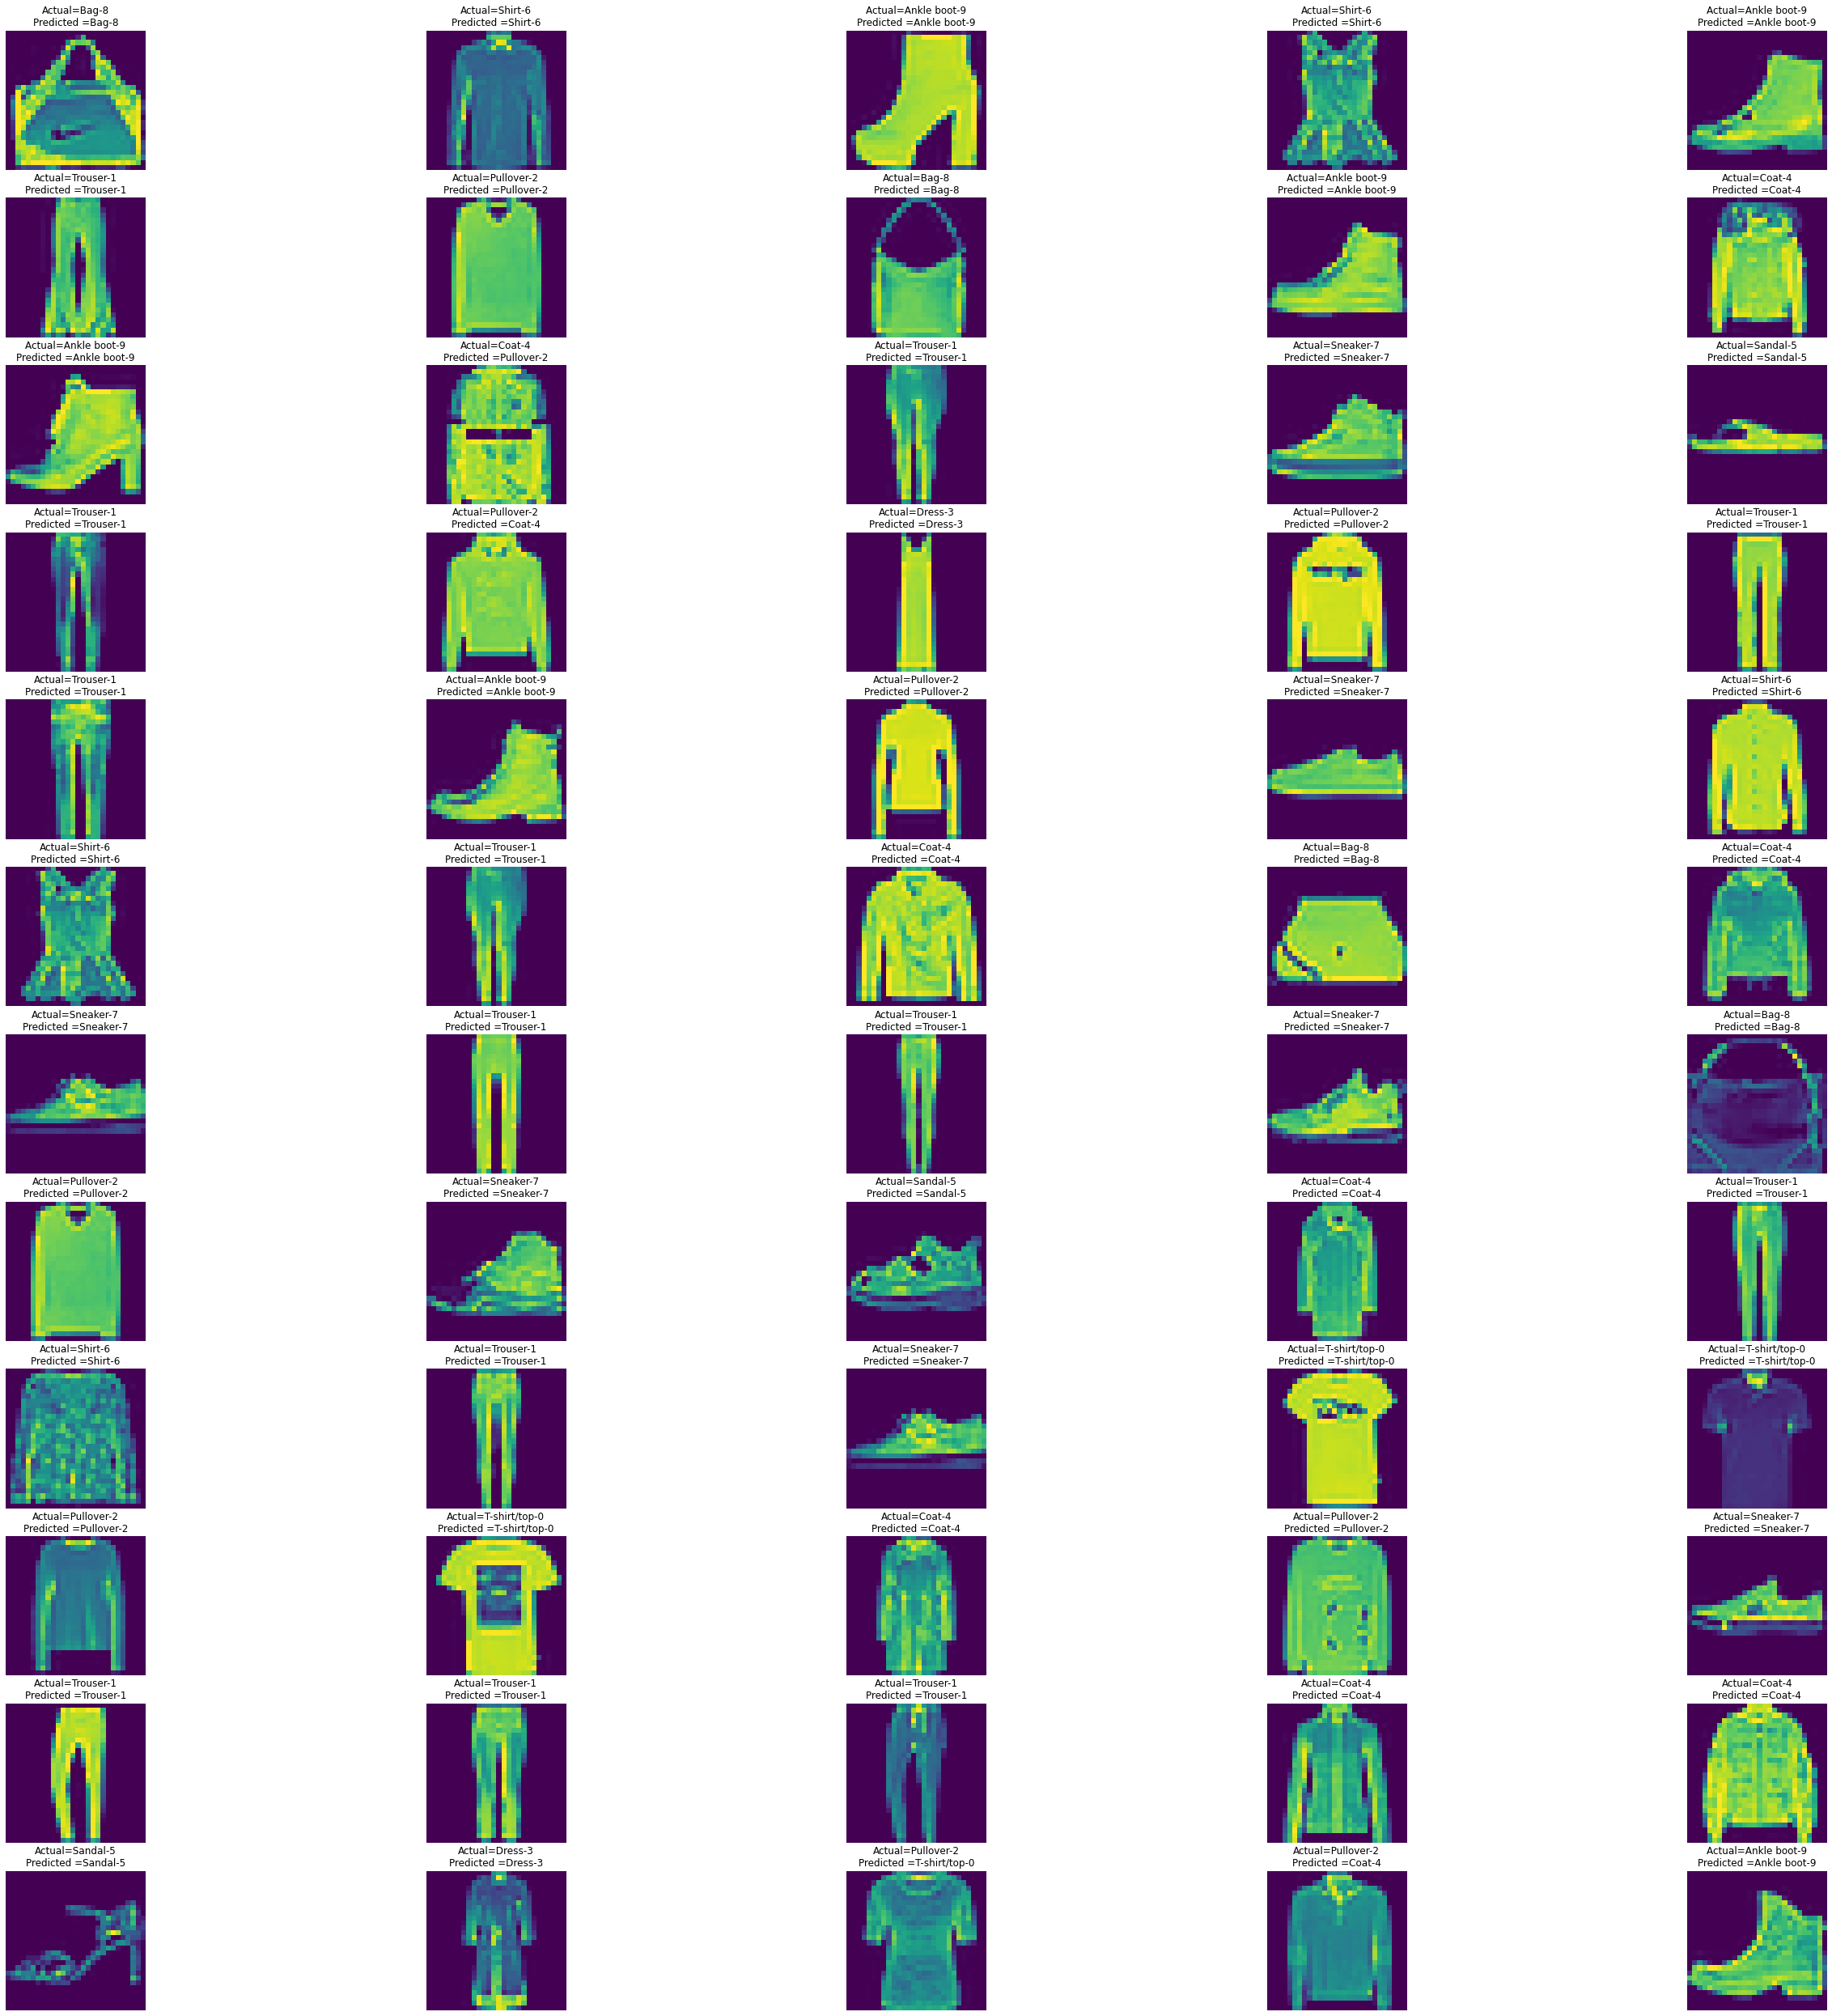

In [35]:
#To show 60 images randomly  first 1000 images
MPL.figure(figsize=(45,45))
j=1
for i in NP.random.randint(0,1000,60):
    MPL.subplot(12,5,j);j=j+1
    MPL.imshow(IP_test[i]) #0-255
    MPL.axis('off')
    MPL.title('Actual={}-{}\nPredicted ={}-{}'.
              format(Class_Labels[OP_test[i]],OP_test[i],
    Class_Labels[OP_pred[i]],OP_pred[i]))

In [36]:
IP_test.ndim

4

In [37]:
IP_test = IP_test.reshape(10000,28,28)

In [38]:
IP_test.ndim

3